### 1.1 Library Import

In [54]:
import pandas as pd
import numpy as np
import os
import pickle as pk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import sklearn.feature_selection as fs

### 1.2 Pickling


In [15]:
def dump_var(var,var_name):
    dump_path=r'.'
    dump_var=dump_path+"\\"+var_name+".pickle"
    var_file=open(dump_var,"wb")
    pk.dump(var,var_file)
    var_file.close()
    
def load_var(var_name):
    load_path=r'.'
    load_var=load_path+"\\"+var_name+".pickle"
    with open(load_var,"rb") as var_file:
        print(load_var)
        content=pk.load(var_file)
    var_file.close()
    return content

### 2.1 Data Load

In [16]:
story = pd.read_csv(r'story.csv', header=None, error_bad_lines=False)
#user_favorite_author = pd.read_csv(r'author_favorites.csv', header=None)

b'Skipping line 846594: expected 15 fields, saw 16\n'
b'Skipping line 921885: expected 15 fields, saw 17\nSkipping line 944703: expected 15 fields, saw 16\n'
b'Skipping line 1432931: expected 15 fields, saw 16\n'
b'Skipping line 2681587: expected 15 fields, saw 16\n'
b'Skipping line 2714733: expected 15 fields, saw 16\nSkipping line 2722010: expected 15 fields, saw 17\n'
b'Skipping line 2873331: expected 15 fields, saw 16\nSkipping line 2877823: expected 15 fields, saw 16\n'
b'Skipping line 3163468: expected 15 fields, saw 16\n'
b'Skipping line 4059418: expected 15 fields, saw 16\n'
b'Skipping line 4106282: expected 15 fields, saw 16\nSkipping line 4108099: expected 15 fields, saw 16\n'
b'Skipping line 4368618: expected 15 fields, saw 16\nSkipping line 4369413: expected 15 fields, saw 17\n'
b'Skipping line 4951246: expected 15 fields, saw 16\nSkipping line 4978213: expected 15 fields, saw 16\n'
b'Skipping line 5660786: expected 15 fields, saw 17\n'
b'Skipping line 6070843: expected 15 

In [17]:
story.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,2161,1,1,1,11893756,The Dark Artfices: Breaking the Parabatai Bond...,8,4037,15,5,8,1460504592,1469946358,0.0
1,2,2161,2,2,1,11891152,Beautifully Broken,1,2280,11,19,8,1460372044,-1,1.0
2,3,2161,3,2,1,11889356,Why lie?,13,39604,69,33,59,1460295195,1471631294,0.0
3,4,2161,4,2,1,11889122,the things that hound you,1,2471,4,7,5,1460281763,-1,1.0
4,5,2161,5,1,2,11879689,Blue,1,622,4,2,2,1459809143,-1,1.0


In [18]:
columns=['id','fandom_id','user_id','rating_id','language_id',
         'ff_story_id','title','chapters','words',
         'reviews','favorites','followers','date_published',
         'date_updated','is_complete']
story.columns=columns
story.head()

,id,fandom_id,user_id,rating_id,language_id,ff_story_id,title,chapters,words,reviews,favorites,followers,date_published,date_updated,is_complete
0,1,2161,1,1,1,11893756,The Dark Artfices: Breaking the Parabatai Bond...,8,4037,15,5,8,1460504592,1469946358,0.0
1,2,2161,2,2,1,11891152,Beautifully Broken,1,2280,11,19,8,1460372044,-1,1.0
2,3,2161,3,2,1,11889356,Why lie?,13,39604,69,33,59,1460295195,1471631294,0.0
3,4,2161,4,2,1,11889122,the things that hound you,1,2471,4,7,5,1460281763,-1,1.0
4,5,2161,5,1,2,11879689,Blue,1,622,4,2,2,1459809143,-1,1.0


### 2.2 Aggregated GOT Tables


In [19]:
game_ot=story[story.fandom_id == 8477][['user_id','id','reviews','chapters','favorites','followers','words']].groupby('user_id').agg({
    'id':['count'],
    'reviews':['sum'],
    'chapters':['sum'],
    'favorites':['sum','mean'],
    'followers':['sum','mean'],
    'words':['sum']
})
game_ot.columns = ["_".join(x) for x in game_ot.columns.ravel()]
GOT=game_ot.reset_index()

In [20]:
GOT.head()

,user_id,id_count,reviews_sum,chapters_sum,favorites_sum,favorites_mean,followers_sum,followers_mean,words_sum
0,165,1,93,22,198,198.0,257,257.00,33780
1,687,4,17,4,112,28.0,29,7.25,13195
2,1285,2,94,6,216,108.0,237,118.50,38458
3,1791,1,3,3,15,15.0,27,27.00,7304
4,1885,1,0,1,12,12.0,1,1.00,821


In [ ]:
user_id_GOT=sorted(np.array(GOT['user_id']))
user_authors=np.array(user_favorite_author)

### 2.3 Extract list of users and favourited authors from user_author table (very time consuming)

In [ ]:
user_author_got=np.array( [[users[0],users[1]] for users in user_authors if users[0] in user_id_GOT and users[1] in user_id_GOT])

In [ ]:
pd.to_csv("user_author_got","User_Authors_Got_only.csv")

### 2.4 Unique number of users and authors favourited by users

In [37]:
user_author_got_csv=pd.read_csv("User_Authors_Got_only.csv")
user_author_got=np.array(user_author_got_csv[['0','1']])

In [38]:
print("Users: "+str(len(np.unique(user_author_got[:,0]))))
print("Authors favorited by users: "+str(len(np.unique(user_author_got[:,1]))))

Users: 632
Authors favorited by users: 894


### 3.0 PageRank

In [ ]:
kv_list=np.array(user_author_got)

s1=set(kv_list[:,0])
s2=set(kv_list[:,1])
s=s1.union(s2)
AuthorList=list(s)
AuthorList.sort()
AuthorDict={}
for i in range(len(AuthorList)):
    AuthorDict[AuthorList[i]]=i

NormKVList=np.zeros(shape=(len(kv_list),2))
for i in range(len(kv_list)):
    NormKVList[i][0]=AuthorDict[kv_list[i][0]]
    NormKVList[i][1]=AuthorDict[kv_list[i][1]]

# Define a zero Matrix with length as number of unique journals
len_NormKV_list=len(NormKVList)
AdjMat=np.zeros(shape=(len(AuthorList),len(AuthorList)))

for i in range(len_NormKV_list):
    AdjMat[int(NormKVList[i][1]),int(NormKVList[i][0])]=1

# Get column sums
ColSum=AdjMat.sum(axis=0)
ColSum1=np.array(ColSum)

# Set the column sums with value 0 to -1 (to avoid 0/0 and X/0 divisions)
ColSum1[ColSum1==0]=-1

# Normaliza the matrix
AdjMat_norm=np.true_divide(AdjMat, ColSum1)

# Dangling Nodes
Dang=np.array(ColSum1)
Dang[Dang>0]=0
Dang[Dang==-1]=1

# Teleoport Vector
TeleportVector=np.full(len(AuthorList),(1/len(AuthorList)))
InitialStartVector=np.array(TeleportVector)

# PageRank Parameters
alpha=0.85
e=0.0001
H=np.array(AdjMat_norm)
pi_0=np.array(InitialStartVector)
d=np.array(Dang)
pi_k=np.array(pi_0)
pi_k1=np.empty(len(pi_0))
run_flag=True
a=np.array(TeleportVector)

countIterations=0
run_flag=True
def l1(pi_1,pi_2):
    return np.round(np.linalg.norm((pi_1-pi_2),1),5)

    ### l1 output rounded off to 5 digits as e=0.00001

while(run_flag):
    countIterations+=1
    pi_k1=np.array(alpha*(H.dot(pi_k))+(alpha*(d.dot(pi_k))+(1-alpha))*a) #Pagerank equation
    if l1(pi_k,pi_k1)<e:
        run_flag=False
    pi_k=np.array(pi_k1)


EF=100*np.true_divide(H.dot(pi_k),np.sum(H.dot(pi_k)))

# Generate Index
EF_index=np.arange(0,len(AuthorList))

# Concat two arrays
EF_final=np.vstack((EF, EF_index))

EF_finalT=EF_final.T

# Sort the journals and get top 20
sortedEF_finalT=EF_finalT[EF_finalT[:,0].argsort()[::-1]][0:20]

def get_key(val):
    for key, value in AuthorDict.items():
        if val == value:
            return key

# Get Authors from Dictionary
for i in range(len(sortedEF_finalT)):
    print("Score: "+str(sortedEF_finalT[i][0])+" Author:"+str(get_key(sortedEF_finalT[i][1])))

In [ ]:
pageranks=np.zeros(shape=(len(EF_finalT),2))

for i in range(len(EF_finalT)):
    pageranks[i][0]=get_key(EF_finalT[i][1])
    pageranks[i][1]=EF_finalT[i][0]

### 3.2 If PageRanks are computed earlier, then load the file directly

In [39]:
pageranks=pd.read_csv('pagerank.csv')
pageranks=pageranks.drop(columns=['Unnamed: 0'])
pgs=pd.DataFrame(pageranks,columns=['user_id','score']).astype({'user_id':np.int64,'score':float})
#merged_scores=GOT.merge(pgs,how='left',on='user_id')

In [56]:
pageranks.head()

,user_id,score
0,165,0.120611
1,687,0.002339
2,1285,0.066899
3,1791,0.091770
4,1885,0.000000


In [44]:
merged_scores=GOT.merge(pageranks,how='left',on='user_id')
merged_scores[(merged_scores['score']!=0) & (merged_scores['score']!=np.nan)].head()

,user_id,id_count,reviews_sum,chapters_sum,favorites_sum,favorites_mean,followers_sum,followers_mean,words_sum,score
0,165,1,93,22,198,198.0,257,257.00,33780,0.120611
1,687,4,17,4,112,28.0,29,7.25,13195,0.002339
2,1285,2,94,6,216,108.0,237,118.50,38458,0.066899
3,1791,1,3,3,15,15.0,27,27.00,7304,0.091770
5,1895,1,6,1,23,23.0,12,12.00,1358,0.002479


### 3.3 Plot Histogram

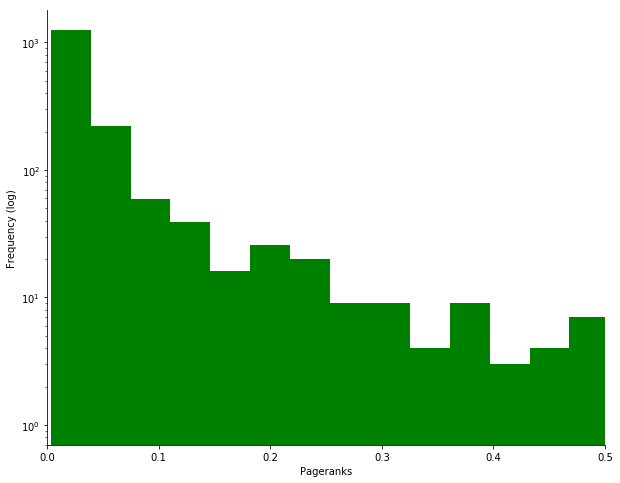

In [45]:
pg_df=pd.read_csv(r'C:\Users\ajink\Documents\drg\data\pg.csv')
pg_df.columns=['id','rank']
pg_df1=pg_df[pg_df['rank']!=0]
fig, ax=plt.subplots(1,1,figsize=(10,8))
ax.set_ylabel("Frequency (log)")
ax.set_xlabel("Pageranks")
ax.set_yscale('log')
ax.set_xlim(0, 0.5)
ax.hist(pg_df1['rank'],bins=100,color='Green')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### 3.4 Filter the records based on nulls and zeros scores

In [46]:
GOT_filtered=merged_scores[(merged_scores['score']!=0) & (merged_scores['score'].notnull())]

In [47]:
GOT_filtered['story_chapter_product']=GOT_filtered['id_count']*GOT_filtered['chapters_sum']

C:\Users\ajink\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
GOT_filtered.head()

,user_id,id_count,reviews_sum,chapters_sum,favorites_sum,favorites_mean,followers_sum,followers_mean,words_sum,score,story_chapter_product
0,165,1,93,22,198,198.0,257,257.00,33780,0.120611,22
1,687,4,17,4,112,28.0,29,7.25,13195,0.002339,16
2,1285,2,94,6,216,108.0,237,118.50,38458,0.066899,12
3,1791,1,3,3,15,15.0,27,27.00,7304,0.091770,3
5,1895,1,6,1,23,23.0,12,12.00,1358,0.002479,1


In [51]:
GOT_filtered_1=GOT_filtered[GOT_filtered['score']<=0.5]

### 4.1 Regression - Feature Selection

In [ ]:
feature_list=['reviews_sum','favorites_sum','words_sum','story_chapter_product']

In [55]:
fs.f_regression(GOT_filtered_1[feature_list],GOT_filtered_1['score'])

(array([124.92796537,  93.90702732,  50.74676668,  26.21726782]),
 array([4.05563278e-27, 4.11798725e-21, 2.27859385e-12, 3.79333648e-07]))

### 4.2 Regression - Plots and R-squared

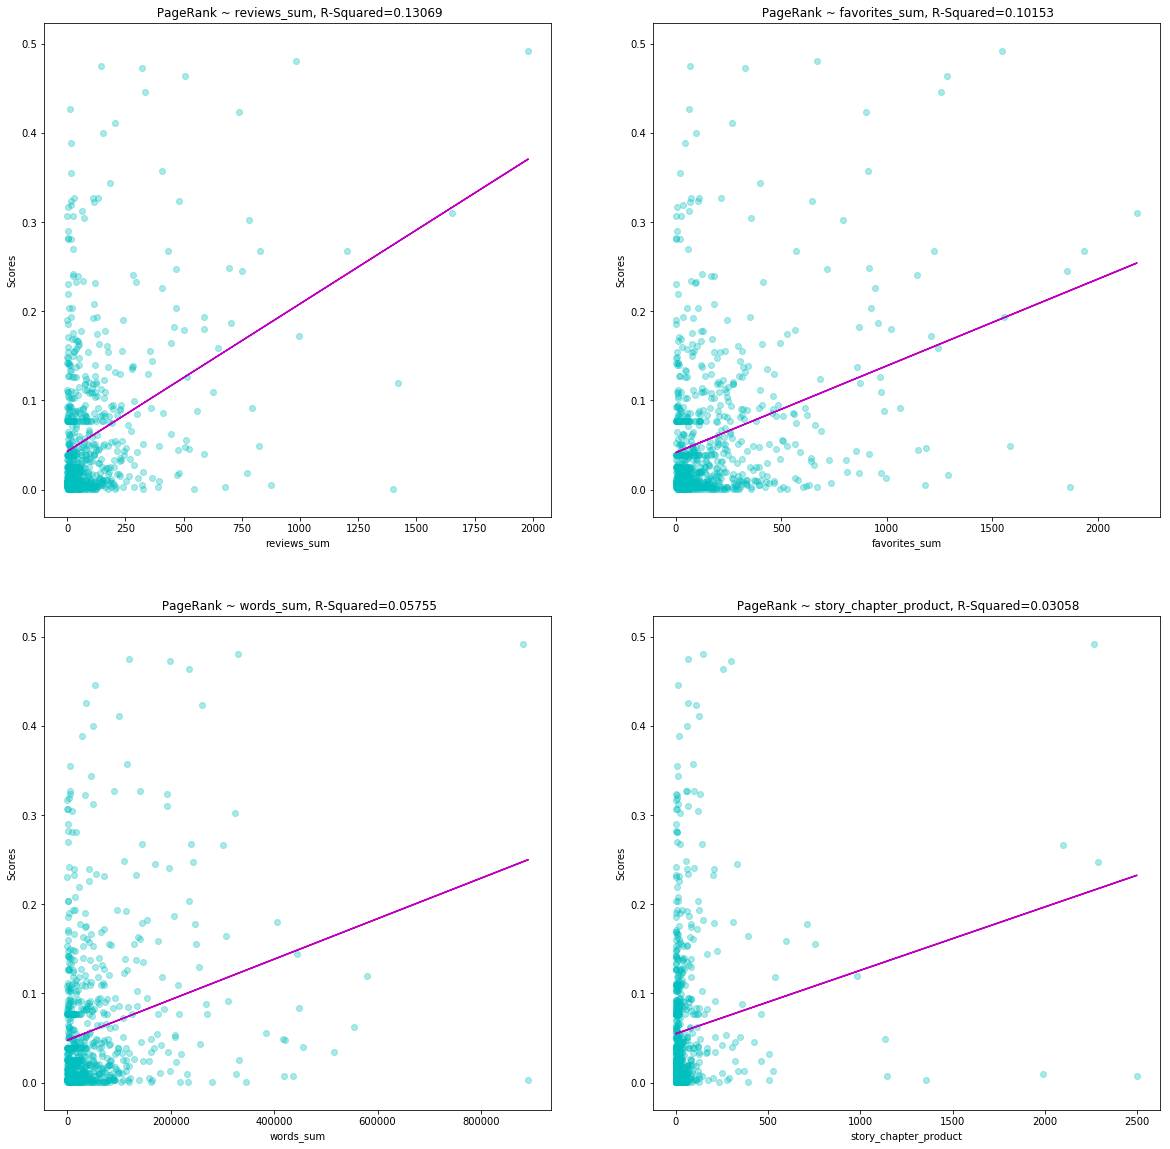

In [52]:
y_tr=np.array(GOT_filtered_1['score'])
results=[]
slope=[]
intercept=[]
x_tr=[]
r2=[]

for index, x_data in enumerate(feature_list):
    x_tr.append(np.array(GOT_filtered_1[[x_data]]))

for index, x_data in enumerate(feature_list):
    reg = LinearRegression().fit(x_tr[index], y_tr)
    r2.append(reg.score(x_tr[index], y_tr))
    slope.append(reg.coef_)
    intercept.append(reg.intercept_)


fig, axs = plt.subplots(2,2, figsize=(20, 20))
for index, x_data in enumerate(feature_list):
    axs[int(index/2)][index%2].scatter(x_tr[index],y_tr,c='c',alpha=0.33)
    y = slope[index]*x_tr[index] + intercept[index]
    axs[int(index/2)][index%2].plot(x_tr[index], y, 'm-')
    axs[int(index/2)][index%2].set_title(" PageRank ~ "+str(x_data)+", R-Squared="+str(round(r2[index],5)))
    axs[int(index/2)][index%2].set_xlabel(x_data)
    axs[int(index/2)][index%2].set_ylabel('Scores')
plt.show()